In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.special import erf
%matplotlib widget

0.9999099281565641
0.961168781237985


C:\Users\allen\AppData\Local\Temp\ipykernel_23560\2363381972.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


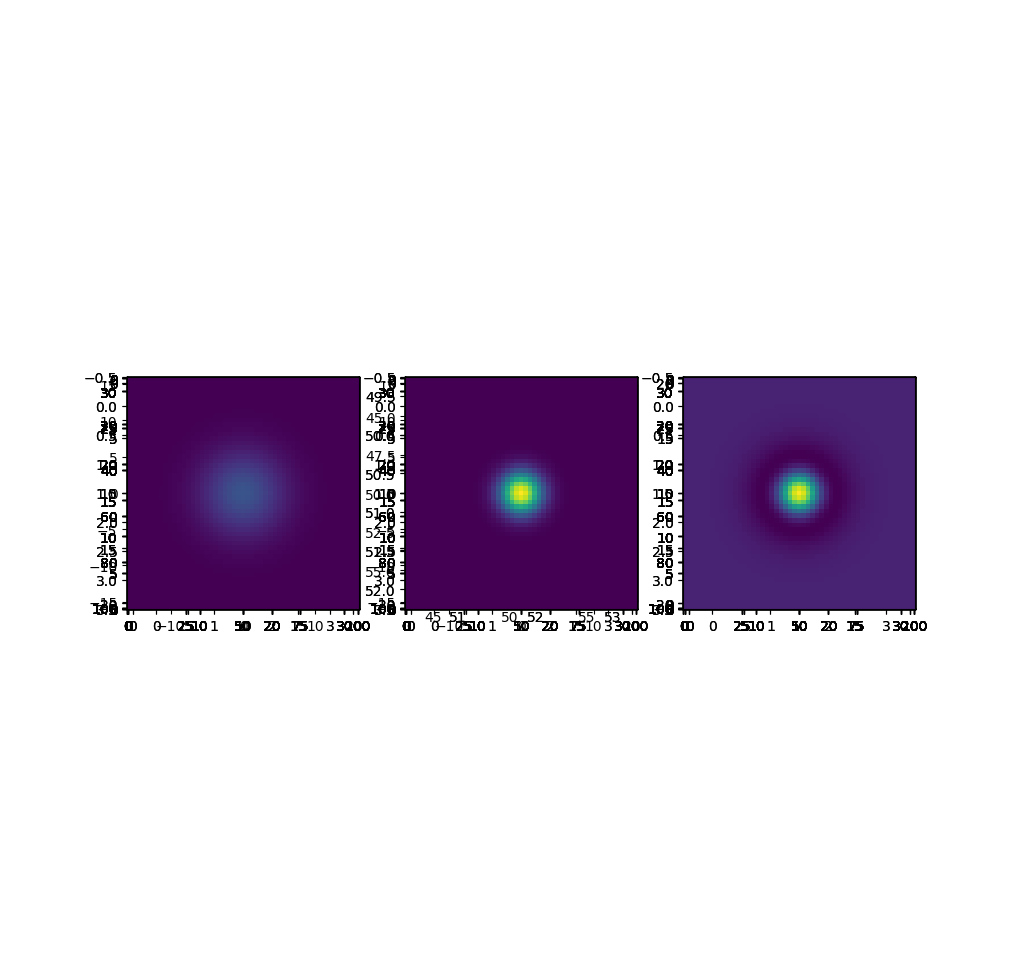

In [36]:
def gaussian(r, sigma):
    '''
    Returns a gaussian profile with its integral over R^2 normalized to identity.
    '''
    return (1 / (2 * np.pi * sigma**2)) * np.exp((-1 / 2) * (r**2 / sigma**2))

def gaussian_noalias(x, y, sigma, dx=None, dy=None):

    if dx is None:
        dx = np.mean(np.diff(x))
    if dy is None:
        dy = np.mean(np.diff(y.T))

    x_min = x - dx / 2
    x_max = x + dx / 2
    y_min = y - dy / 2
    y_max = y + dy / 2
    # print((erf(y_max / (sigma * np.sqrt(2))) - erf(y_min / (sigma * np.sqrt(2)))))
    return 0.25  * \
    (erf(x_max / (sigma * np.sqrt(2))) - erf(x_min / (sigma * np.sqrt(2)))) * \
    (erf(y_max / (sigma * np.sqrt(2))) - erf(y_min / (sigma * np.sqrt(2))))


d = 16
subdiv = 51
dx = (2 * d) / subdiv
cell_area = dx**2
s = np.linspace(-d, d, subdiv)
x, y = np.meshgrid(s, s)

maxboog = []

sigma = 0.5
dq = 0.01
r = np.sqrt(((x - dq)**2 +  y**2))
weak_boog = gaussian(r, sigma=sigma) * cell_area
boog = gaussian_noalias((x - dq), y, sigma=sigma**2)

print(np.sum(boog))
print(np.sum(weak_boog))

plt.close(1)
fig, ax = plt.subplots(1, 3, num=0.1)
fig.tight_layout()

ax[0].imshow(boog, vmin=0, vmax = np.max(boog), origin="lower", extent=[0, 32, 0, 32])
ax[1].imshow(weak_boog, vmin=0, vmax = np.max(weak_boog), origin="lower", extent=[0, 32, 0, 32])
ax[2].imshow((weak_boog - boog), origin="lower", extent=[0, 32, 0, 32])

plt.show()

0.39369473279507883
0.39369473279507883
0.39369473279507883


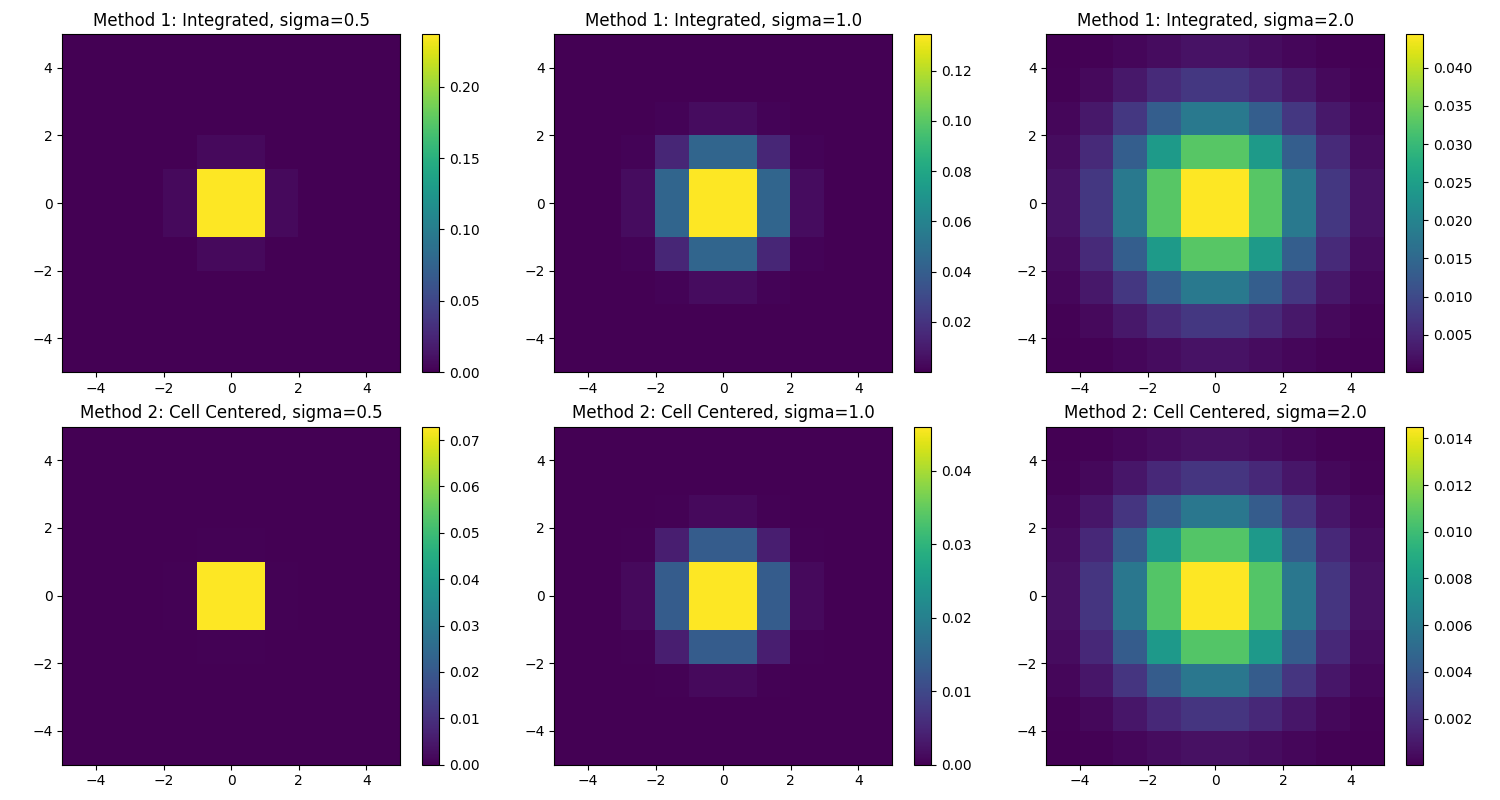

0.9890835488123693


In [42]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

# Method 1: Integrated Gaussian (using erf)
def gaussian_noalias(x, y, sigma, dx=None, dy=None):
    if dx is None:
        dx = np.mean(np.diff(x))
    if dy is None:
        dy = np.mean(np.diff(y.T))

    x_min = x - dx / 2
    x_max = x + dx / 2
    y_min = y - dy / 2
    y_max = y + dy / 2

    return 0.25 * (erf(x_max / (sigma * np.sqrt(2))) - erf(x_min / (sigma * np.sqrt(2)))) * \
                 (erf(y_max / (sigma * np.sqrt(2))) - erf(y_min / (sigma * np.sqrt(2))))

# Method 2: Cell-centered Gaussian
def gaussian(x, y, sigma):
    dx = np.mean(np.diff(x))
    dy = np.mean(np.diff(y), axis=1)
    print(cell_area)
    r = np.sqrt(x**2 + y**2)

    return (1 / (2 * np.pi * sigma**2)) * np.exp((-1 / 2) * (r**2 / sigma**2)) * cell_area

# Define a low-resolution grid
N = 10  # Low resolution
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)

# Test with different values of sigma
sigmas = [0.5, 1.0, 2.0]

# Prepare subplots
fig, axes = plt.subplots(2, len(sigmas), figsize=(15, 8))

for i, sigma in enumerate(sigmas):
    # Calculate both methods
    Z_noalias = gaussian_noalias(X, Y, sigma)
    Z_centered = gaussian(X, Y, sigma)

    # Plot Method 1 (integrated Gaussian)
    im1 = axes[0, i].imshow(Z_noalias, extent=(-5, 5, -5, 5), origin='lower')
    axes[0, i].set_title(f'Method 1: Integrated, sigma={sigma}')
    fig.colorbar(im1, ax=axes[0, i])

    # Plot Method 2 (cell-centered approximation)
    im2 = axes[1, i].imshow(Z_centered, extent=(-5, 5, -5, 5), origin='lower')
    axes[1, i].set_title(f'Method 2: Cell Centered, sigma={sigma}')
    fig.colorbar(im2, ax=axes[1, i])

# Adjust layout for clarity
plt.tight_layout()
plt.show()

print(np.sum(Z_noalias))
